# Analýza nehod cyklistů v Brně

Datová sada pochází z portálu https://data.brno.cz/ a obsahuje záznamy o všech evidovaných nehodách cyklistů na území Brna od roku 2010 do roku 2021.

## Načtení dat do dataframu Pandas

In [1]:
import pandas as pd 
data = pd.read_csv("https://raw.githubusercontent.com/mlcollege/ai-academy/main/05-Zaklady-datove-analyzy/data/nehody_cyklistu.csv", sep=';')
data.head()

,datum,srazka,zavineni,alkohol,nasledek,prilba,pohlavi
0,2013/10/16 00:00:00+00,srážka s jedoucím nekolejovým vozidlem,řidičem motorového vozidla,"Ano, obsah alkoholu v krvi od 0,5‰ do 0,8‰",lehké zranění,ano,muž
1,2014/06/14 00:00:00+00,srážka s chodcem,chodcem,Ne,lehké zranění,ne,muž
2,2014/08/13 00:00:00+00,havárie,řidičem nemotorového vozidla,"Ano, obsah alkoholu v krvi 1,5‰ a více",lehké zranění,ne,muž
3,2014/08/29 00:00:00+00,havárie,řidičem nemotorového vozidla,"Ano, obsah alkoholu v krvi 1,5‰ a více",lehké zranění,ne,muž
4,2015/02/02 00:00:00+00,"srážka s vozidlem zaparkovaným, odstaveným",řidičem nemotorového vozidla,"Ano, obsah alkoholu v krvi 1,5‰ a více",lehké zranění,ne,muž


## Vizualizace

Vizualizujeme jednotlivé atributy formou vykreslení histogramu jejich hodnot.

Klasifikace nehody.


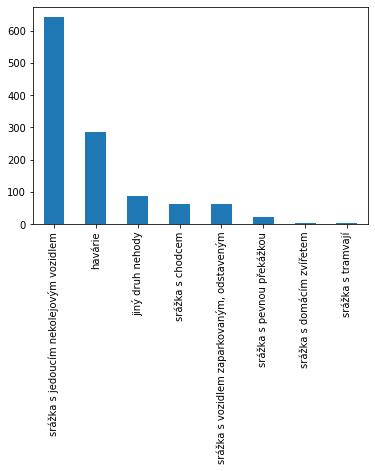

In [2]:
data['srazka'].value_counts().plot.bar()
print ('Klasifikace nehody.')

Zavinění nehody.


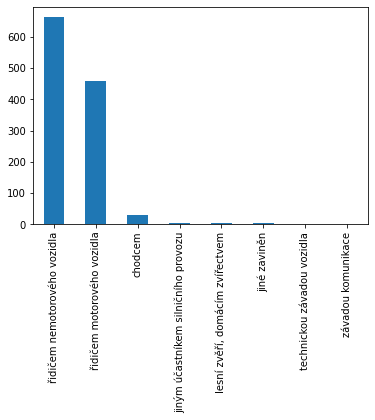

In [3]:
data['zavineni'].value_counts().plot.bar()
print ('Zavinění nehody.')

Přítomnost návykových látek v krvi.


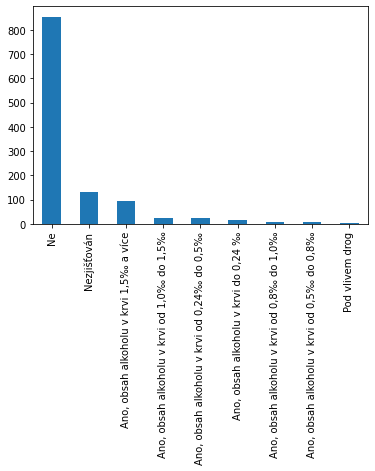

In [4]:
data['alkohol'].value_counts().plot.bar()
print ('Přítomnost návykových látek v krvi.')

Následek nehody.


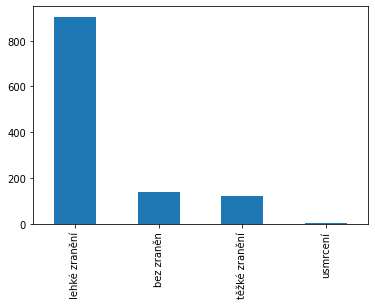

In [5]:
data['nasledek'].value_counts().plot.bar()
print ('Následek nehody.')

Měl cyklista v době nehody na hlavě přilbu?


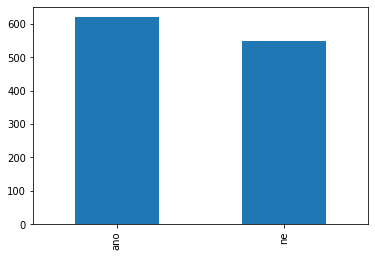

In [6]:
data['prilba'].value_counts().plot.bar()
print ('Měl cyklista v době nehody na hlavě přilbu?')

Pohlaví


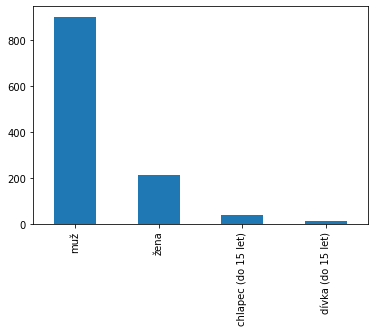

In [7]:
data['pohlavi'].value_counts().plot.bar()
print ('Pohlaví')

## Analýza dat

 **Úkol č. 1:** Zjistěte, ve kterých dnech v týdnu a měsících dochází nehodám cyklistů nejčastěji.

Převedeme první sloupec na datový typ datetime.

In [8]:
data['datum'] = pd.to_datetime(data['datum'])
print(data['datum'].dtype)

datetime64[ns, UTC]


Vytvoříme nové sloupce, které budou odpovídat hodině, měsíci a dni v týdnu. Dále vytvoříme histogram pro jednotlivé dny a výsledek vizualizujeme.

In [9]:
data['dvt'] = data['datum'].dt.weekday
weekDay = {0:'pondeli', 1:'utery', 2:'streda', 3:'ctvrtek', 4:'patek', 5:'sobota', 6:'nedele'}
data['dvt'] = data['dvt'].map(weekDay)
data['mesic'] = data['datum'].dt.month

Počty nehod pro jednotlivé dny v týdnu.


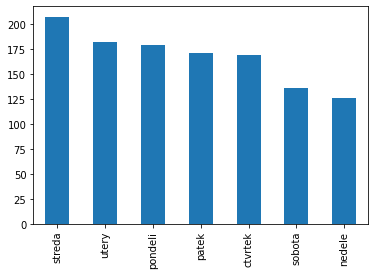

In [10]:
data['dvt'].value_counts().plot.bar()
print("Počty nehod pro jednotlivé dny v týdnu.")

Počty nehod pro jednotlivé měsíce.


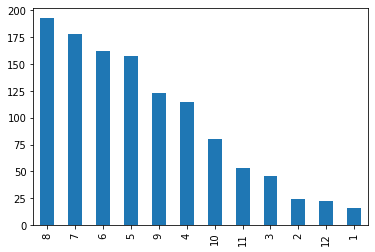

In [11]:
data['mesic'].value_counts().plot.bar()
print("Počty nehod pro jednotlivé měsíce.")

### Otázky k diskuzi
* Jak se dají interpretovat výsledky?
* Lze z výsledků usuzovat, že budeme podstupovat nejvyšší riziko, pokud se na kole po Brně vydáme ve středu nebo v srpnu?
* Jaká dodatečná data by nám pomohla lépe určit rizikovost jízdy na kole pro daná období?

 **Úkol č. 2:** Vytvořte koláčové grafy následků nehody zvlášť pro cyklisty s přilbou a bez přilby a zhodnoťte, zda data prokazují, že má nošení přilby vliv na snížení závažnosti následků.

In [12]:
prilba_ano = data[data['prilba'] == 'ano']
prilba_ne = data[data['prilba'] == 'ne']

S přilbou


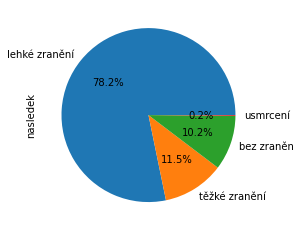

In [13]:
prilba_ano['nasledek'].value_counts().plot.pie(autopct='%1.1f%%')
print ('S přilbou')

Bez přilby


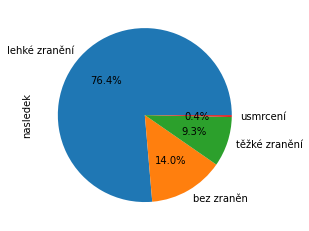

In [14]:
prilba_ne['nasledek'].value_counts().plot.pie(autopct='%1.1f%%')
print ('Bez přilby')

**Úkol č. 3:** Zjistěte, zda v Brně nosí cyklistickou helmu častěji muži nebo ženy.

In [15]:
zeny = data[data['pohlavi'] == 'žena']
muzi = data[data['pohlavi'] == 'muž']

Ženy s přilbou


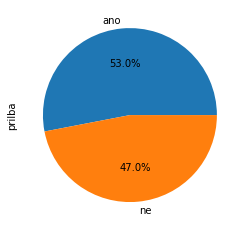

In [16]:
zeny['prilba'].value_counts().plot.pie(autopct='%1.1f%%')
print ('Ženy s přilbou')

Muži s přilbou


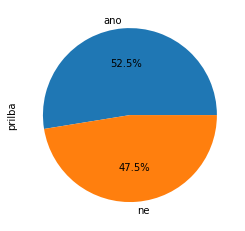

In [17]:
muzi['prilba'].value_counts().plot.pie(autopct='%1.1f%%')
print ('Muži s přilbou')